<a href="https://colab.research.google.com/github/RahulJuluru2/unit2assignments/blob/main/U3W14_CS_Timeseries_Analysis_Class_RJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

### Not for Grading

### Comparison of various methods in Timeseries Analysis

In [1]:
#@title Case Study Walkthrough
#@markdown  Comparison of various methods in Timeseries Analysis
from IPython.display import HTML

HTML("""<video width="320" height="240" controls>
  <source src="https://cdn.talentsprint.com/talentsprint/archives/sc/aiml/aiml_2018_b7_hyd/preview_videos/time_series_analysis.mp4">
</video>
""")

### Time Series Models

In this experiment, we will build different  time-series forecasting models to get a forecast for Onion prices. 

Basic models: 

1. Mean Constant Model
2. Linear Trend Model
3. Random Walk Model

Advanced models:

1.   Simple Exponential Smoothing Model
2.   ARIMA Model
3.   MLP Model



### Setup Steps

In [2]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "2216842" #@param {type:"string"}


In [3]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9959488784" #@param {type:"string"}


In [4]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

ipython = get_ipython()
  
notebook= "U3W14_CS_Timeseries_Analysis" #name of the notebook
Answer = "Ungraded"
def setup():
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Casestudies_slides/Week6/MonthWiseMarketArrivals_Clean.csv")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Casestudies_slides/Week6/ts_mlpr.joblib")
    ipython.magic("sx pip3 install statsmodels")
    #ipython.magic("sx pip install scipy==1.2 --upgrade")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "feedback_experiments_input" : Comments, "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:",submission_id)
        print("Date of submission: ",r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    
else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


### Import the required packages

In [5]:
pip install "scikit_learn==0.22.2.post1"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.1 MB 31.8 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.22.2.post1 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.22.2.post1 which is incompatible.


In [6]:
# Import the python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import statsmodel
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

In [7]:
# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

### Load the Monthwise Quantity and Price csv file using Pandas

In [8]:
# Read the csv file of Monthwise Quantity and Price csv file we have.
df = pd.read_csv('MonthWiseMarketArrivals_Clean.csv')

### Preprocess the loaded data to get the required tidy dataframe

In [9]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [10]:
# Changing the date column to a Time Interval columnn
df.date = pd.DatetimeIndex(df.date)
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


In [11]:
# Sort the data frame by date
df = df.sort_values(by = "date")

In [12]:
# Change the index to the date column
df.index = pd.PeriodIndex(df.date, freq='M')
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
1996-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01
1996-02,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01
1996-03,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01
1996-04,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01
1996-05,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01


### Select the city with maximum count for a market to get better data for time series analysis

In [13]:
cities, counts = np.unique(df.city.values, return_counts=True)

In [14]:
city = cities[np.argmax(counts)]

### Get the priceMod of this city  by dropping redundant columns

In [15]:
dfls = df.loc[df.city == city].copy()

In [16]:
dfls.columns

Index(['market', 'month', 'year', 'quantity', 'priceMin', 'priceMax',
       'priceMod', 'state', 'city', 'date'],
      dtype='object')

In [17]:
# Drop redundant columns
dfls = dfls.drop(["market", "month", "year", "state", "city", "priceMin", "priceMax"], axis = 1)

In [18]:
dfls.head()

,quantity,priceMod,date
date,,,
1996-01,225063,226,1996-01-01
1996-02,196164,186,1996-02-01
1996-03,178992,243,1996-03-01
1996-04,192592,254,1996-04-01
1996-05,237574,269,1996-05-01


### Transformation - Log

Transformations such as logarithms can help to stabilize the variance of a time series. 


### Apply the Log transformation to 'priceMod' column to stabilize the variance of a time series and add as a separate column

Plot the bar plots for  'priceMod' and 'priceModlog' 

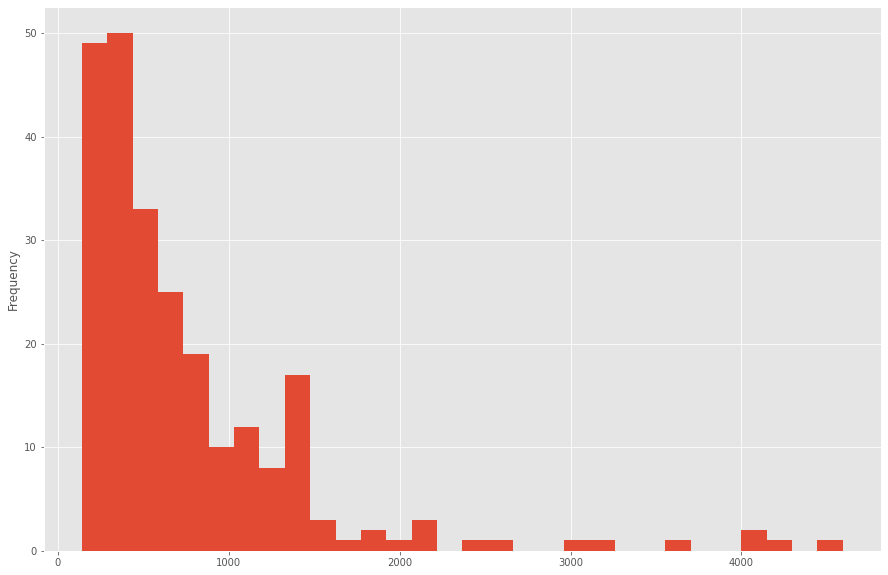

In [19]:
dfls.priceMod.plot(kind = "hist", bins = 30)

In [20]:
dfls['priceModLog'] = np.log(dfls.priceMod)
dfls.head()

,quantity,priceMod,date,priceModLog
date,,,,
1996-01,225063,226,1996-01-01,5.420535
1996-02,196164,186,1996-02-01,5.225747
1996-03,178992,243,1996-03-01,5.493061
1996-04,192592,254,1996-04-01,5.537334
1996-05,237574,269,1996-05-01,5.594711


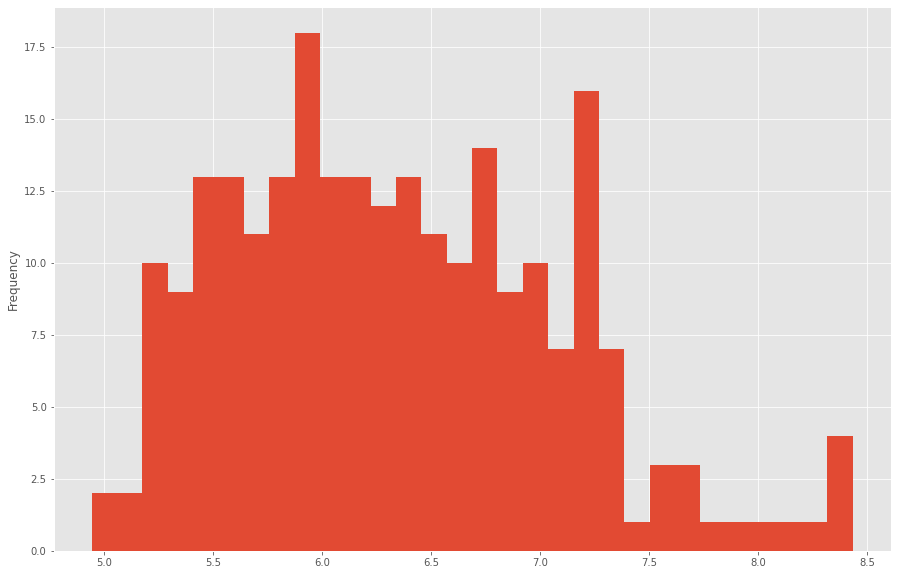

In [21]:
dfls.priceModLog.plot(kind = "hist", bins = 30)

### Visualize the line plot for the 'priceModLog' column

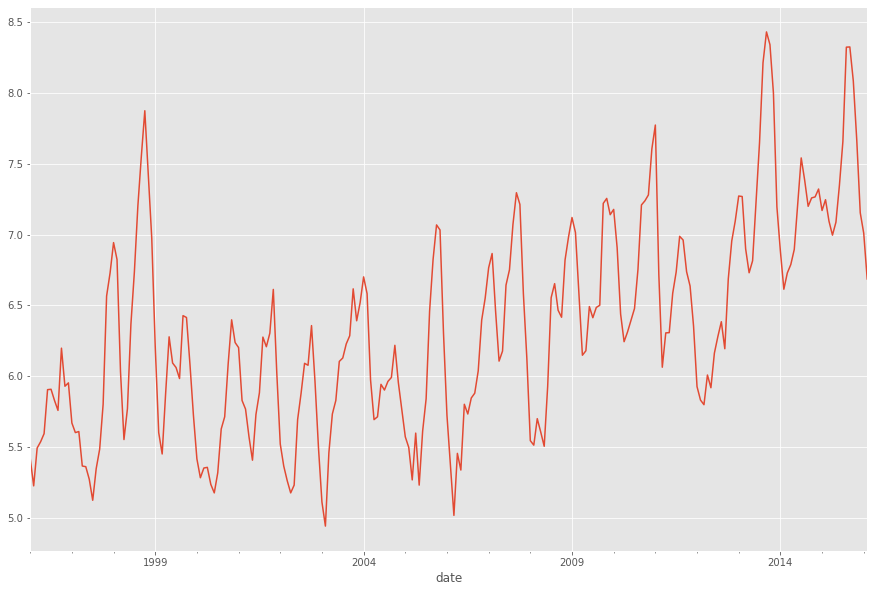

In [22]:
dfls.priceModLog.plot()



### Mean  Model

This very simple forecasting model will be called the "mean model"

#### Applying mean to 'priceModLog' and take exponential and add as a separate column

In [23]:
model_mean_pred = dfls.priceModLog.mean()

In [24]:
# Let us store this as our Mean Predication Value
dfls["priceMean"] = np.exp(model_mean_pred)

#### Plot the line plots of 'priceMod' and 'priceMean'

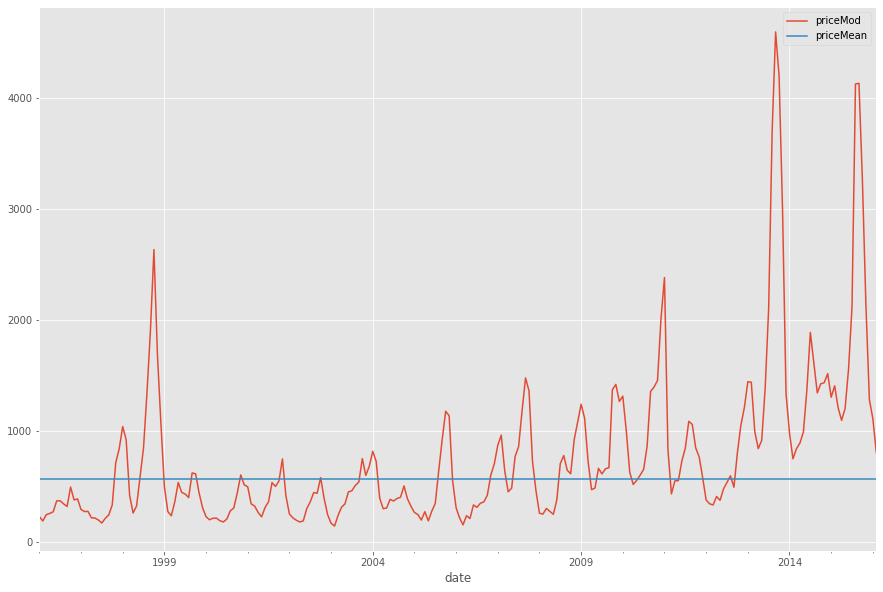

In [25]:
dfls.plot(kind="line", x="date", y = ["priceMod", "priceMean"])

#### Use Root Mean Squared Error (RMSE) to calculate our error values

$RMSE = \Sigma \sqrt{ (\hat{y} - y)^2/n} $ , where $\hat{y}$ is  predicted value of y

#### Define RMSE function

In [26]:
def RMSE(predicted, actual):
    mse = (predicted - actual)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

#### Calculate RMSE of 'priceMean' and 'priceMod' and save it in a dataframe

In [27]:
model_mean_RMSE = RMSE(dfls.priceMean, dfls.priceMod)
model_mean_RMSE

739.7611298704513

In [28]:
# Save this in a dataframe
dflsResults = pd.DataFrame(columns = ["Model","RMSE"])
dflsResults.head()

,Model,RMSE


In [29]:
dflsResults.loc[0,"Model"] = "Mean"
dflsResults.loc[0,"RMSE"] = model_mean_RMSE
dflsResults.head()

,Model,RMSE
0,Mean,739.76113


### Linear Trend Model

Let us start by plotting a linear trend model between priceModLog and time.
.

#### Add a 'timeIndex' column in a month format

In [30]:
# What is the starting month of our data
dfls.date.min()

Timestamp('1996-01-01 00:00:00')

#### Calculate the difference between the current date and initial / starting date

In [31]:
# Convert date in datetimedelta figure starting from zero
dfls["timeIndex"] = dfls.date - dfls.date.min()

In [32]:
dfls.head()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex
date,,,,,,
1996-01,225063,226,1996-01-01,5.420535,564.668286,0 days
1996-02,196164,186,1996-02-01,5.225747,564.668286,31 days
1996-03,178992,243,1996-03-01,5.493061,564.668286,60 days
1996-04,192592,254,1996-04-01,5.537334,564.668286,91 days
1996-05,237574,269,1996-05-01,5.594711,564.668286,121 days


#### Covert the format of timeIndex from days to months

In [33]:
# Convert to months using the timedelta function
dfls["timeIndex"] =  dfls["timeIndex"]/np.timedelta64(1, 'M')

In [34]:
dfls.head()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex
date,,,,,,
1996-01,225063,226,1996-01-01,5.420535,564.668286,0.000000
1996-02,196164,186,1996-02-01,5.225747,564.668286,1.018501
1996-03,178992,243,1996-03-01,5.493061,564.668286,1.971293
1996-04,192592,254,1996-04-01,5.537334,564.668286,2.989794
1996-05,237574,269,1996-05-01,5.594711,564.668286,3.975441


#### Round the 'timeIndex' column to 0

In [35]:
# Round the number to 0
dfls["timeIndex"] = dfls["timeIndex"].round(0).astype(int)

#### Calculate linear regression between 'priceModlog' and 'timeIndex'

In [36]:
## Now plot linear regression between priceModlog and timeIndex
model_linear = smf.ols('priceModLog ~ timeIndex', data = dfls).fit()

In [37]:
## Parameters for y = mx + c equation
model_linear.params
m = model_linear.params[0]
c = model_linear.params[1]

In [38]:
model_linear_pred = model_linear.predict()

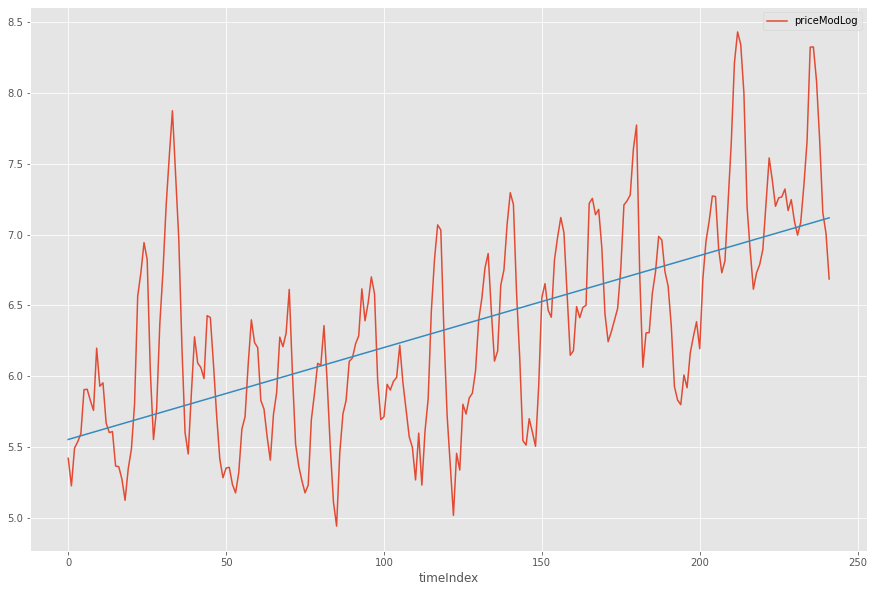

In [39]:
# Plot the prediction line
dfls.plot(kind="line", x="timeIndex", y = "priceModLog")
plt.plot(dfls.timeIndex,model_linear_pred, '-')

In [40]:
dfls["priceLinear"] = np.exp(model_linear_pred)

In [41]:
dfls.head()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex,priceLinear
date,,,,,,,
1996-01,225063,226,1996-01-01,5.420535,564.668286,0,258.133325
1996-02,196164,186,1996-02-01,5.225747,564.668286,1,259.815605
1996-03,178992,243,1996-03-01,5.493061,564.668286,2,261.508848
1996-04,192592,254,1996-04-01,5.537334,564.668286,3,263.213127
1996-05,237574,269,1996-05-01,5.594711,564.668286,4,264.928512


In [42]:
# Root Mean Squared Error (RMSE)
model_linear_RMSE = RMSE(dfls.priceLinear, dfls.priceMod)
model_linear_RMSE

613.3247959007717

In [43]:
#Storing the results
dflsResults.loc[1,"Model"] = "Linear"
dflsResults.loc[1,"RMSE"] = model_linear_RMSE
dflsResults.head()

,Model,RMSE
0,Mean,739.76113
1,Linear,613.324796


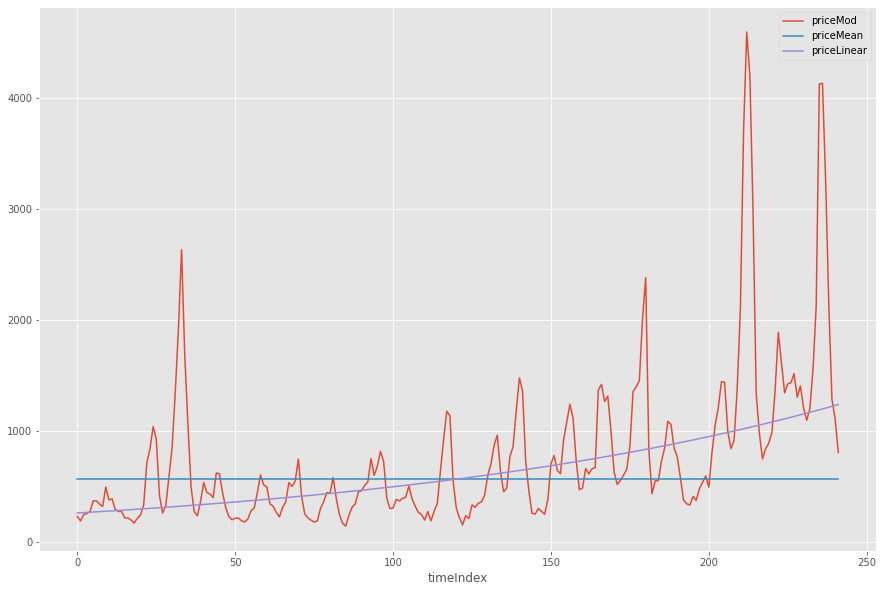

In [44]:
dfls.plot(kind="line", x="timeIndex", y = ["priceMod", "priceMean", "priceLinear"])

### Random Walk Model

When faced with a time series that shows irregular growth, the best strategy may not be to try to directly predict the level of the series at each period (i.e., the quantity Yt). Instead, it may be better to try to predict the change that occurs from one period to the next (i.e., the quantity Yt - Yt-1). That is, it may be better to look at the first difference of the series, to see if a predictable pattern can be found there. For purposes of one-period-ahead forecasting, it is just as good to predict the next change as to predict the next level of the series, since the predicted change can be added to the current level to yield a predicted level. The simplest case of such a model is one that always predicts that the next change will be zero, as if the series is equally likely to go up or down in the next period regardless of what it has done in the past.


**Random Walk Model** $ \hat{Y_t} = Y_{t-1} + \epsilon $

**Random Walk Model with drift** $ \hat{Y_t} = Y_{t-1} + c + \epsilon $

In [45]:
dfls["priceModLogShift1"] = dfls.priceModLog.shift()

In [46]:
dfls.head()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex,priceLinear,priceModLogShift1
date,,,,,,,,
1996-01,225063,226,1996-01-01,5.420535,564.668286,0,258.133325,NaN
1996-02,196164,186,1996-02-01,5.225747,564.668286,1,259.815605,5.420535
1996-03,178992,243,1996-03-01,5.493061,564.668286,2,261.508848,5.225747
1996-04,192592,254,1996-04-01,5.537334,564.668286,3,263.213127,5.493061
1996-05,237574,269,1996-05-01,5.594711,564.668286,4,264.928512,5.537334


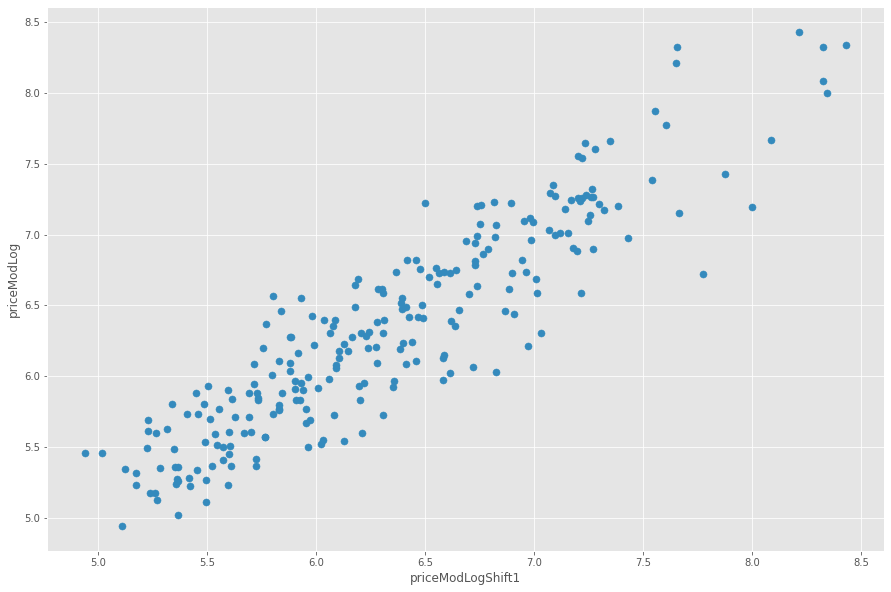

In [47]:
dfls.plot(kind= "scatter", y = "priceModLog", x = "priceModLogShift1", s = 50)

In [48]:
# Lets plot the one-month difference curve
dfls["priceModLogDiff"] = dfls.priceModLog - dfls.priceModLogShift1

In [49]:
dfls["priceRandom"] = np.exp(dfls.priceModLogShift1)
dfls.head()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex,priceLinear,priceModLogShift1,priceModLogDiff,priceRandom
date,,,,,,,,,,
1996-01,225063,226,1996-01-01,5.420535,564.668286,0,258.133325,NaN,NaN,NaN
1996-02,196164,186,1996-02-01,5.225747,564.668286,1,259.815605,5.420535,-0.194788,226.0
1996-03,178992,243,1996-03-01,5.493061,564.668286,2,261.508848,5.225747,0.267315,186.0
1996-04,192592,254,1996-04-01,5.537334,564.668286,3,263.213127,5.493061,0.044273,243.0
1996-05,237574,269,1996-05-01,5.594711,564.668286,4,264.928512,5.537334,0.057377,254.0


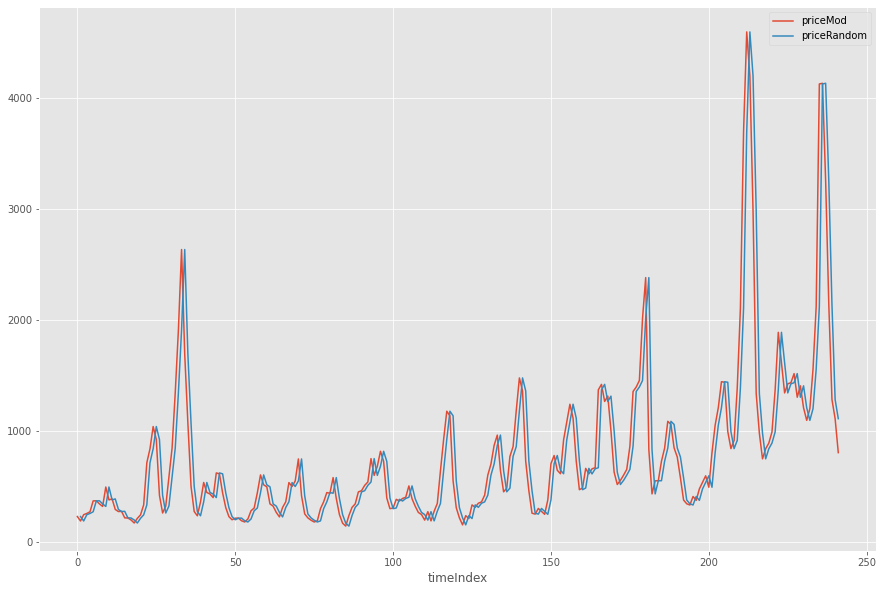

In [50]:
dfls.plot(kind="line", x="timeIndex", y = ["priceMod","priceRandom"])

In [51]:
# Root Mean Squared Error (RMSE)
model_random_RMSE = RMSE(dfls.priceRandom, dfls.priceMod)
model_random_RMSE

341.53638713091726

In [52]:
dflsResults.loc[2,"Model"] = "Random"
dflsResults.loc[2,"RMSE"] = model_random_RMSE
dflsResults.head()

,Model,RMSE
0,Mean,739.76113
1,Linear,613.324796
2,Random,341.536387


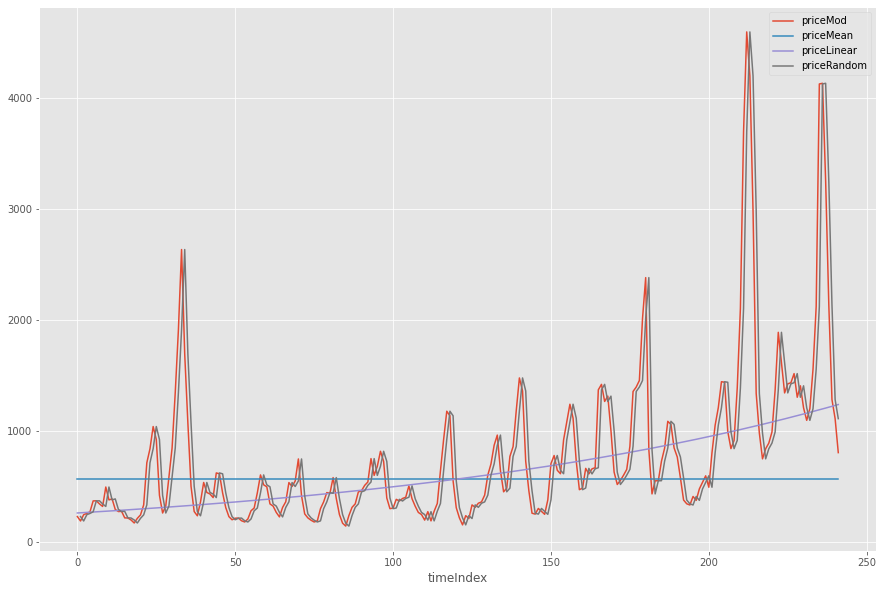

In [53]:
dfls.plot(kind="line", x="timeIndex", y = ["priceMod", "priceMean", "priceLinear", "priceRandom"])


### Simple Exponential Smoothing Model (SES)

Instead of equally weighting each of the observation, in the SES model we give more weightage to the recent observations and less to the older ones. This is done by the using a smoothing variable like alpha

$\hat{y_t} = \alpha y_{t-1} + (1-\alpha)\hat{y_{t-1}}$

In [54]:
dfls['priceModLogExp12'] = dfls['priceModLog'].ewm(halflife=2).mean()

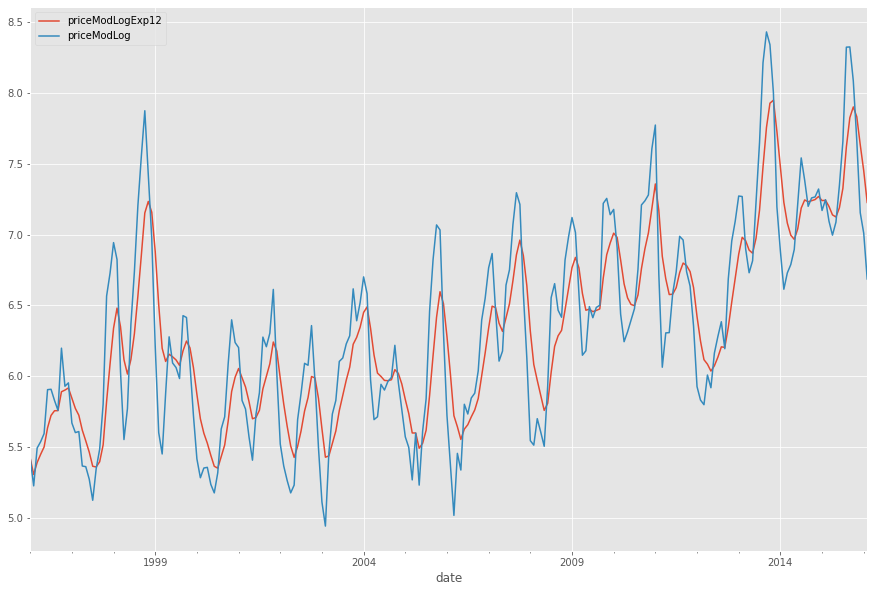

In [55]:
dfls.plot(kind ="line", y=["priceModLogExp12", "priceModLog"])

In [56]:
dfls["priceExp12"] = np.exp(dfls.priceModLogExp12)
dfls.tail()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex,priceLinear,priceModLogShift1,priceModLogDiff,priceRandom,priceModLogExp12,priceExp12
date,,,,,,,,,,,,
2015-10,30532,3248,2015-10-01,8.085795,564.668286,237,1203.533249,8.326033,-0.240238,4130.0,7.902404,2703.773858
2015-11,178713,2134,2015-11-01,7.665753,564.668286,238,1211.376792,8.085795,-0.420041,3248.0,7.833091,2522.713818
2015-12,438498,1280,2015-12-01,7.154615,564.668286,239,1219.271452,7.665753,-0.511138,2134.0,7.634370,2068.067221
2016-01,563321,1108,2016-01-01,7.010312,564.668286,240,1227.217561,7.154615,-0.144303,1280.0,7.451587,1722.595461
2016-02,292870,802,2016-02-01,6.687109,564.668286,241,1235.215457,7.010312,-0.323203,1108.0,7.227677,1377.019639


In [57]:
# Root Mean Squared Error (RMSE)
model_Exp12_RMSE = RMSE(dfls.priceExp12, dfls.priceMod)
model_Exp12_RMSE

382.3122412878933

In [58]:
dflsResults.loc[3,"Model"] = "Exp Smoothing 12"
dflsResults.loc[3,"RMSE"] = model_Exp12_RMSE
dflsResults.head()

,Model,RMSE
0,Mean,739.76113
1,Linear,613.324796
2,Random,341.536387
3,Exp Smoothing 12,382.312241


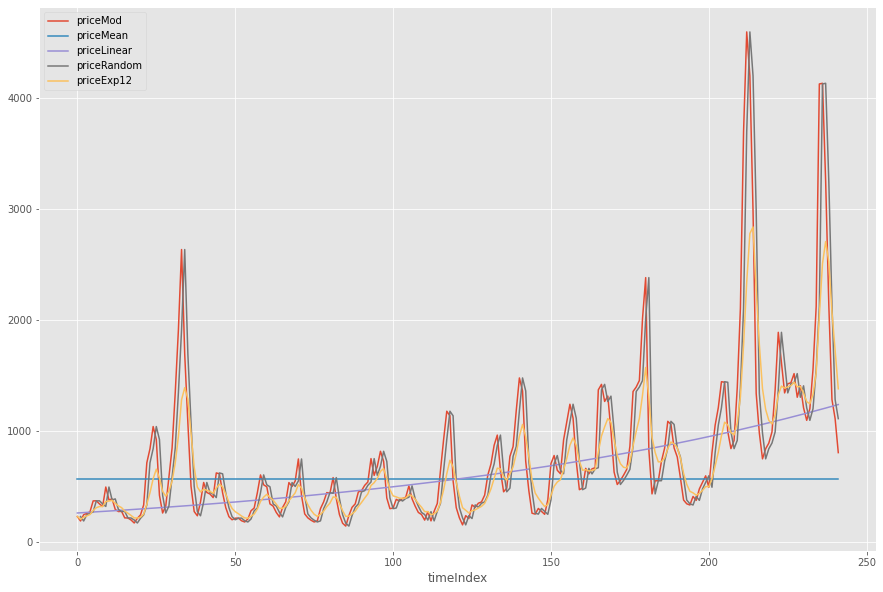

In [59]:
dfls.plot(kind="line", x="timeIndex", y = ["priceMod", "priceMean", "priceLinear", 
                                             "priceRandom", "priceExp12"])

### Auto Regressive Models - AR(p)

In an autoregression model, we forecast the variable of interest using a linear combination of past values of the variable. The term autoregression indicates that it is a regression of the variable against itself.

Thus an autoregressive model of order (p) can be written as

$ y_t = c + m_1y_{t-1} + m_2y_{t-2} + m_3y_{t-3} + .. $

**Random walk model is an AR(1) model with** 
$ m_1=1,  c = 0 $

**Random walk model with drift model** 
$ m_1=1,  c \not= 0 $

We normally restrict autoregressive models to stationary data, and then some constraints on the values of the parameters are required.

For an AR(1) model:   $ −1<m_1<−1 $

For an AR(2) model:   
$ −1<m_2<−1, m_1 + m_2 < 1, m_2 - m_1 <1 $

### Moving Average Model - MA(q)

Rather than use past values of the forecast variable in a regression, a moving average model uses past forecast errors in a regression-like model.

$ y_t=c+e_t+l_1 e_{t−1}+l_2 e_{t−2} + ... + l_q e_{t-q} $

where `e` is white noise. We refer to this as an MA(`q`) model. Of course, we do not observe the values of e(t), so it is not really regression in the usual sense.

Notice that each value of `y(t)` can be thought of as a weighted moving average of the past few forecast errors. However, moving average models should not be confused with moving average smoothing. A moving average model is used for forecasting future values while moving average smoothing is used for estimating the trend-cycle of past values.

### ARIMA Model

If we combine differencing with autoregression and a moving average model, we obtain a non-seasonal ARIMA model. ARIMA is an acronym for AutoRegressive Integrated Moving Average model (“integration” in this context is the reverse of differencing). The full model can be written as

- **Number of AR (Auto-Regressive) terms (p)**: AR terms are just lags of dependent variable. For instance if p is 5, the predictors for y(t) will be y(t-1)….y(t-5).
- **Number of MA (Moving Average) terms (q)**: MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for y(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
- **Number of Differences (d)**: These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.



In [60]:
ts = dfls.priceModLog
ts_diff = dfls.priceModLogDiff
ts_diff.dropna(inplace = True)

#### Running the ARIMA Model 

In [61]:
from statsmodels.tsa.arima_model import ARIMA

In [62]:
ts_diff.head()

date
1996-02   -0.194788
1996-03    0.267315
1996-04    0.044273
1996-05    0.057377
1996-06    0.310650
Freq: M, Name: priceModLogDiff, dtype: float64

In [63]:
# Running the ARIMA Model(1,0,1)
model_AR1MA = ARIMA(ts_diff, order=(1,0,1))

In [64]:
results_ARIMA = model_AR1MA.fit(disp = -1)

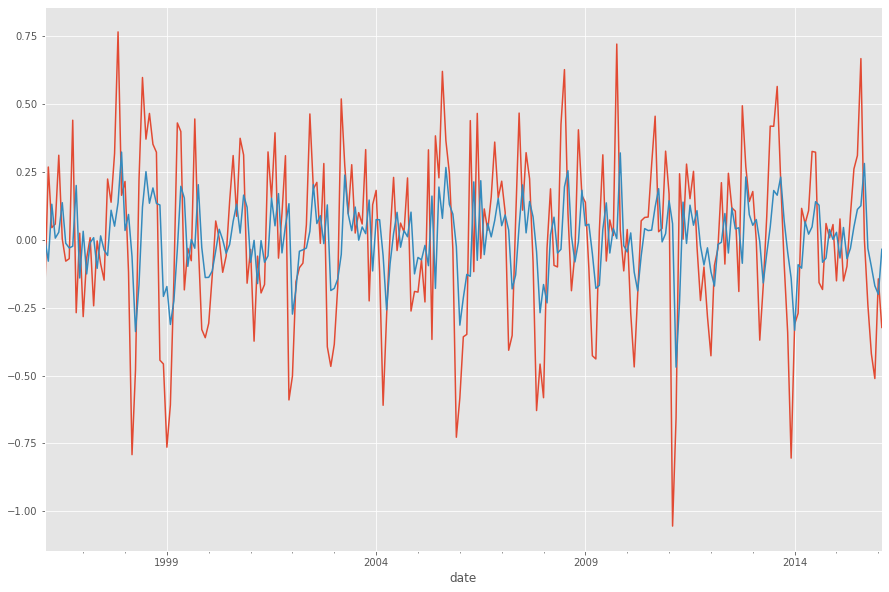

In [65]:
ts_diff.plot()
results_ARIMA.fittedvalues.plot()

In [66]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)

In [67]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

In [68]:
predictions_ARIMA_log = pd.Series(ts.iloc[0], index=ts.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.tail()

date
2015-10    7.106269
2015-11    7.007094
2015-12    6.837166
2016-01    6.636042
2016-02    6.600484
Freq: M, dtype: float64

In [69]:
dfls['priceARIMA'] = np.exp(predictions_ARIMA_log)

In [70]:
model_arima_RMSE = RMSE(dfls.priceARIMA, dfls.priceMod)

In [71]:
dflsResults.loc[4,"Model"] = "Arima"
dflsResults.loc[4,"RMSE"] = model_arima_RMSE
dflsResults.head()

,Model,RMSE
0,Mean,739.76113
1,Linear,613.324796
2,Random,341.536387
3,Exp Smoothing 12,382.312241
4,Arima,617.895739


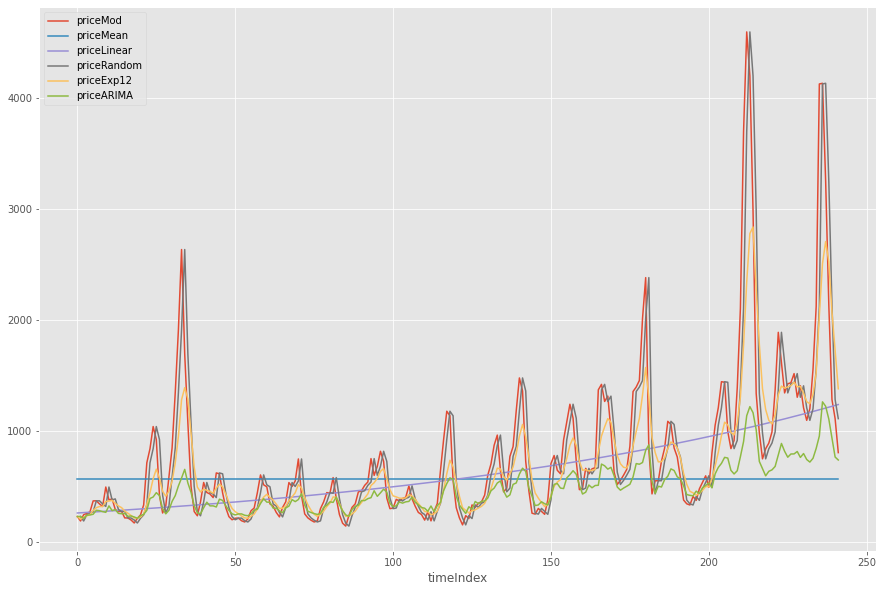

In [73]:
dfls.plot(kind="line", x="timeIndex", y = ["priceMod", "priceMean", "priceLinear", "priceRandom",
                                              "priceExp12", "priceARIMA"])

### MLP Model

In [72]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    
    n_vars = data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [74]:
from sklearn.neural_network import MLPRegressor

In [75]:
n=10
Data = series_to_supervised(dfls.priceMod.values.reshape(-1,1),n)
X=Data.values[:, :n]
y=Data.values[:, n]

In [76]:
from joblib import dump, load
mlpr = load('ts_mlpr.joblib')
mlpr

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(25, 25, 25, 25), learning_rate='constant',
             learning_rate_init=0.001, max_fun=None, max_iter=100000,
             momentum=0.9, n_iter_no_change=None, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [77]:
ypred = mlpr.predict(X)

In [78]:
RMSE_MLP = RMSE(pd.Series(mlpr.predict(X)),pd.Series(y))

In [79]:
dfls['priceMLP'] = np.append(np.zeros(10),ypred)

In [80]:
dflsResults.loc[5,"Model"] = "MLP"
dflsResults.loc[5,"RMSE"] = RMSE_MLP
dflsResults

,Model,RMSE
0,Mean,739.76113
1,Linear,613.324796
2,Random,341.536387
3,Exp Smoothing 12,382.312241
4,Arima,617.895739
5,MLP,232.322338


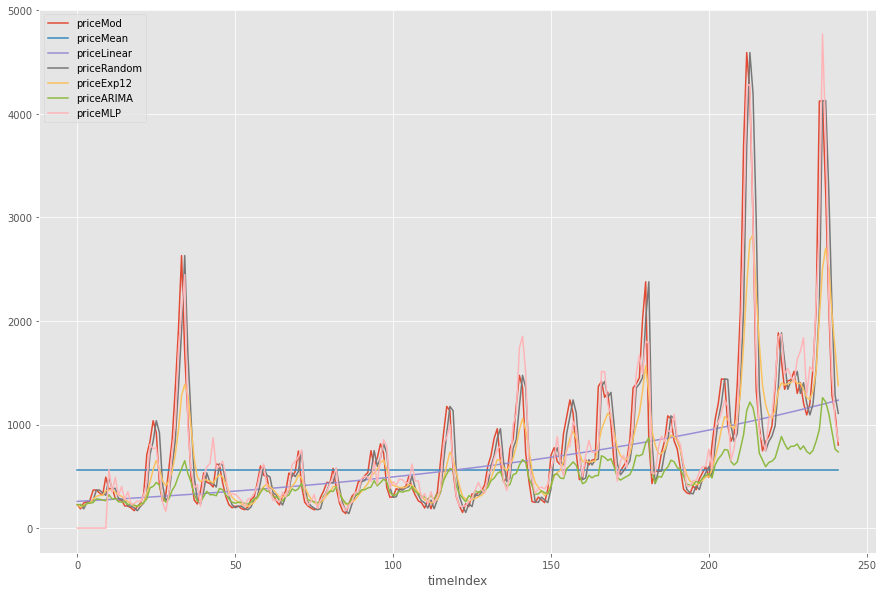

In [81]:
dfls.plot(kind="line", x="timeIndex", y = ["priceMod", "priceMean", "priceLinear", "priceRandom",
                                              "priceExp12", "priceARIMA","priceMLP"])

#### Sort the values by RMSE

In [82]:
dflsResults = dflsResults.sort_values(by='RMSE')

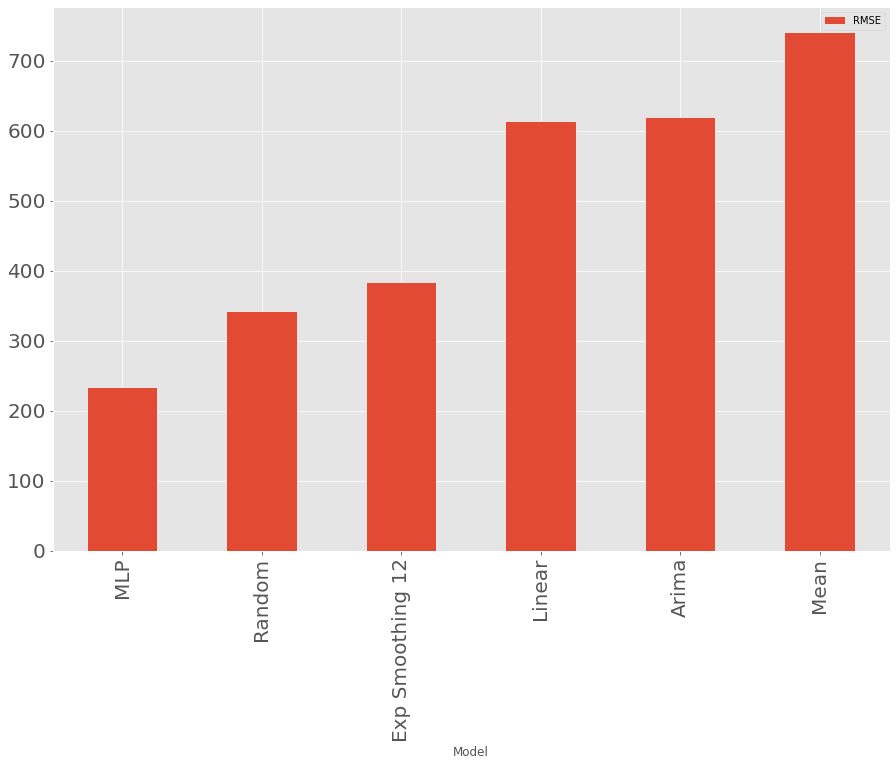

In [83]:
dflsResults.plot(kind="bar", x="Model", y = ["RMSE"])
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

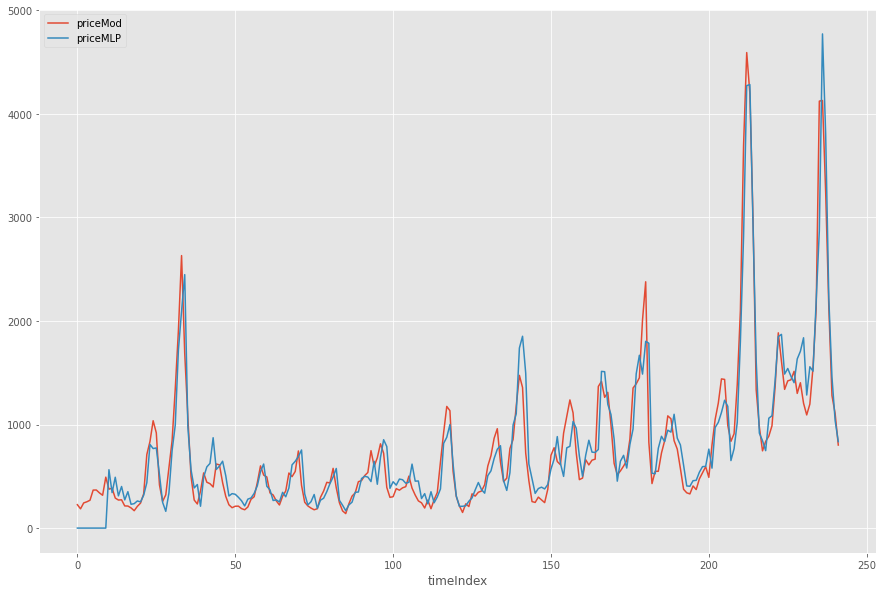

In [84]:
dfls.plot(kind="line", x="timeIndex", y = ["priceMod", "priceMLP"]) 

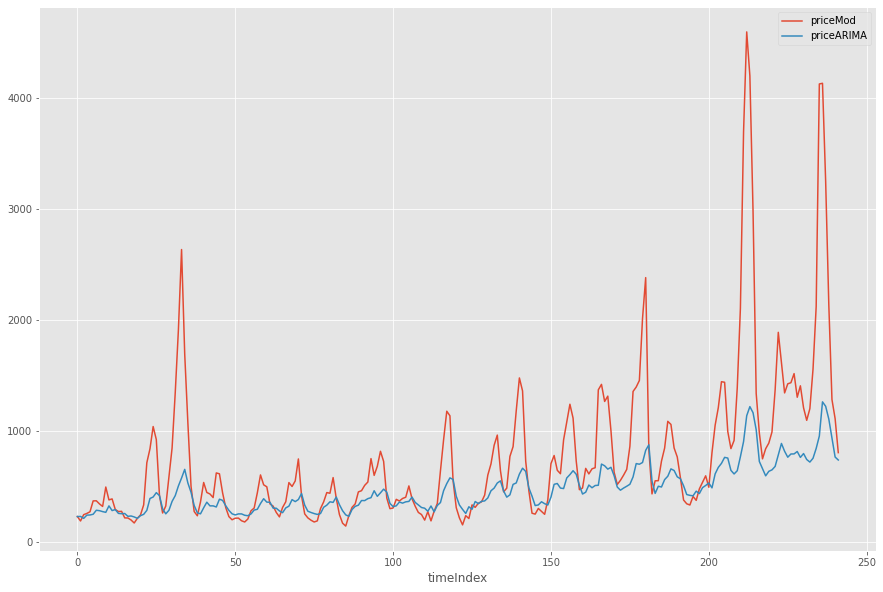

In [85]:
dfls.plot(kind="line", x="timeIndex", y = ["priceMod", "priceARIMA"])

# Please answer the questions below to complete the experiment:

In [86]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [87]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Everything is good" #@param {type:"string"}


In [88]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]

In [89]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [90]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 2278
Date of submission:  14 Aug 2022
Time of submission:  15:11:28
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
